## Silhouette Coefficient

Supervised algorithms have lots of metrics to check their goodness of fit like accuracy, r-square value, sensitivity, specificity etc. but what can we calculate to measure the accuracy or goodness of our clustering technique? The answer to this question is Silhouette Coefficient or Silhouette score.
Silhouette Coefficient:
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of` [-1, 1].`

- 1: Means clusters are well apart from each other and clearly distinguished.
- 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
-1: Means clusters are assigned in the wrong way.
Calculating Silhouette Score


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

Generate some random data.

to run we are going to generate 100 random point.

In [6]:
x = np.random.rand(50,2)
y=2+np.random.rand(50,2)
z = np.concatenate((x,y))
z = pd.DataFrame(z)

In [7]:
z

,0,1
0,0.912642,0.545015
1,0.584408,0.639154
2,0.866574,0.851274
3,0.903100,0.270337
4,0.262212,0.237172
...,...,...
95,2.570598,2.822897
96,2.925563,2.317406
97,2.860191,2.955482
98,2.613023,2.112300


C:\Users\nijat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

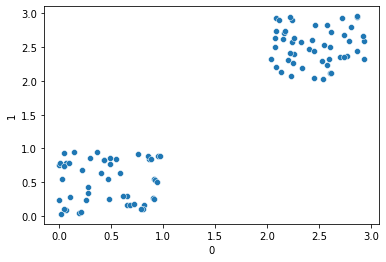

In [8]:
sns.scatterplot(z[0],z[1])

Let's apply KMeans Cluster with 2 clusters.

In [13]:
KMean= KMeans(n_clusters=2)
KMean.fit(z)
label=KMean.predict(z)

Calculating the silhouette score:

In [17]:
print(f'silhouette score(n=2):{silhouette_score(z,label)}')

silhouette score(n=2):0.8082156966716069


We can say that the clusters are well apart from each other as the silhouette score is closer to 1.
To check whether our silhouette score is providing the right information or not let’s create another scatter plot showing labelled data points.


C:\Users\nijat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

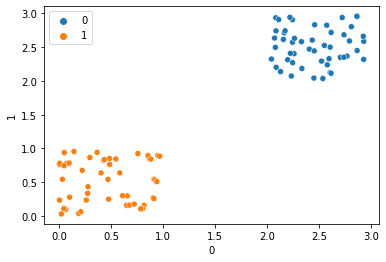

In [18]:
sns.scatterplot(z[0],z[1],hue=label)

Now let's try with 3 clusters:

silhouette score(n=2):0.6003733072954082



C:\Users\nijat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


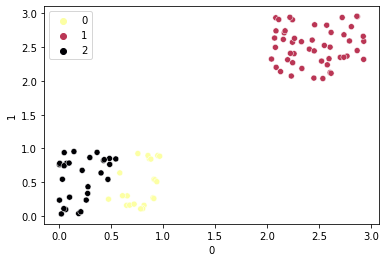

In [23]:
KMean = KMeans(n_clusters=3)
KMean.fit(z)
label = KMean.predict(z)
print(f'silhouette score(n=2):{silhouette_score(z,label)}')
print()
sns.scatterplot(z[0],z[1],hue=label,palette='inferno_r')
plt.show()

As you can see in the above figure clusters are not well apart. The inter cluster distance between cluster 1 and cluster 2 is almost negligible. That is why the silhouette score for n= 3(0.596) is lesser than that of n=2(0.806).
When dealing with higher dimensions, the silhouette score is quite useful to validate the working of clustering algorithm as we can’t use any type of visualization to validate clustering when dimensions are greater than 3.
We can also use the silhouette score to check the optimal number of clusters. In the above example, we can say that the optimal number of clusters is 2 as its silhouette score is greater than that of 3 clusters.


<img src='https://miro.medium.com/max/875/1*cUcY9jSBHFMqCmX-fp8BvQ.jpeg'>